# EDA Project: King County Housing Dataset

![](https://kingcounty.gov/~/media/services/home-property/historic-preservation/images/KirklandHistoricHome.jpeg)

Source: [kingcounty.gov](https://kingcounty.gov/services/home-property/historic-preservation/projects/kirkland-inventory.aspx)

**Authored by: Su Wong**


### Stakeholder: Zachary Brooks, Seller

Stakeholder profile: Invests in historical houses, best neighborhoods, high profits, best timing within a year, should renovate?

### Introduction

The goal in this project was to come up with a few potential homes that fit the requirements of Zachary Brooks. He invests in historical homes in the best neighborhoods, seeking to make high profits within a time frame of a year. He wants to know if the houses he purchases should be renovated to increase his final resale price.

### Assumptions

We assume that historical homes are at least 50 years old.

### Questions:
- How do we define the best neighborhoods? High house prices, large houses, large lots or possibly houses that are similar in size to your neighbors?
- Best timing within a year: How can he increase his profits within a year? Should he renovate the houses that he buys? What kind of renovations can be achieved within a year?
- How are condition, grade, sqrt, bedrooms, bathrooms, total floors, location, etc. related to the final sale price of the house?
- What factors from this list can we improve on within a year to increase profits? 
- Investigate the relationship between the price increase when increasing the condition and grade.

### Hypothesis:

- The better the condition of the house, the higher the price
- The better the grade of the house, the higher the price
- The bigger the house, the closer in sqrt_living15 to sqrt_livingsquare, the higher the price
- The better the neighborhood the house is in, the higher the price

### Column Names and descriptions for the King County Data Set

- **id** - unique identified for a house
- **dateDate** - house was sold
- **pricePrice** - is prediction target
- **bedroomsNumber** - # of bedrooms
- **bathroomsNumber** - # of bathrooms
- **sqft_livingsquare** - footage of the home
- **sqft_lotsquare** - footage of the lot
- **floorsTotal** - floors (levels) in house
- **waterfront** - House which has a view to a waterfront
- **view** - Has been viewed
- **condition** - How good the condition is ( Overall )
- **grade** - overall grade given to the housing unit, based on King County grading system
- **sqft_above** - square footage of house apart from basement
- **sqft_basement** - square footage of the basement
- **yr_built** - Built Year
- **yr_renovated** - Year when house was renovated
- **zipcode** - zip
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Importing packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
from vega_datasets import data

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Reading the data

In [2]:
# Read the data
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

### Exploring the dataset

In [3]:
# View the first 5 rows of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [4]:
# Getting the shape of the DataFrame (there are 21597 entries in the dataset)
df.shape

(21597, 21)

In [5]:
# Column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# Look at some descriptive statistics of the data:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


### Dropping data

There is some data that may not be useful at all. id appears to be a unique identifying number for each sale record. 
It also appears that sqft_living = sqft_above + sqft_basement. These columns are dropped.

In [8]:
# Drop the id column
df.drop('id', axis=1, inplace=True)

# Drop the sqft_above column
df.drop('sqft_above', axis=1, inplace=True)

There also seems to be an extreme outlier in the number of bedrooms. A house with 33 bedrooms but only 1.75 bathrooms does not seem to be realistic. There may have been a mistake during the entry of the data, so we drop the row with this index number.

In [9]:
df.sort_values('bedrooms', ascending=False).head()
if 15856 in df.index:
    df.drop(15856, axis=0, inplace=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,6/25/2014,640000.000,33,1.750,1620,6000,1.000,0.000,0.000,5,7,580.0,1947,0.000,98103,47.688,-122.331,1330,4700
8748,8/21/2014,520000.000,11,3.000,3000,4960,2.000,0.000,0.000,3,7,600.0,1918,1999.000,98106,47.556,-122.363,1420,4960
13301,8/14/2014,1150000.000,10,5.250,4590,10920,1.000,0.000,2.000,3,9,2090.0,2008,0.000,98004,47.586,-122.113,2730,10400
19239,12/29/2014,660000.000,10,3.000,2920,3745,2.000,0.000,0.000,4,7,1060.0,1913,0.000,98105,47.663,-122.320,1810,3745
15147,10/29/2014,650000.000,10,2.000,3610,11914,2.000,0.000,0.000,4,7,600.0,1958,0.000,98006,47.571,-122.175,2040,11914


### Adding columns

The date column is converted to a datetime object. A month and year column is also added for future analysis of seasonal price trends.

In [10]:
df.date = pd.to_datetime(df.date)       # Convert date column to datetime object
df['year'] = df.date.dt.year            # Add year column
df['month'] = df.date.dt.strftime('%b') # Add month column

A hypothesis I have is that houses that have similar sqft_living to their neighbors indicates that they are in better neighborhoods due to more uniformity between houses. Correspondingly, houses in better neighborhoods lead to higher prices. I want to investigate the correlation between house size uniformity and price. A column was added to evaluate the absolute difference in sqft_living for a house and their next 15 neighbors:

In [11]:
df.eval('diff_sqft_living = abs(sqft_living - sqft_living15)', inplace=True)

### Dealing with null values

In [12]:
df.isna().sum()

date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront          2376
view                  63
condition              0
grade                  0
sqft_basement          0
yr_built               0
yr_renovated        3842
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
year                   0
month                  0
diff_sqft_living       0
dtype: int64

There are null values in waterfront, view and yr_renovated columns. Waterfront indicates whether a house has waterfront lot, with 1 meaning "yes" and 0 "no". A waterfront is typically a selling point of a house, therefore it would be advertised that a house has a waterfront. I think it is safe to assume that the missing values in the waterfront column can be replaced by 0.

In [13]:
df["waterfront"].fillna(0, inplace = True)

As for the view column, its meaning is still up for debate. There are a couple different interpretations of this column. The first one is that view represents a rating of how good the view from the house is. Another interpretation is that it represents how many times a house was viewed before it was sold.

In [14]:
df.view.fillna(0, inplace = True)
df.view = df.view.astype(int)

Year renovated: we assume a null value means that it has not been renovated and convert the type to int64

In [15]:
df.yr_renovated.unique()
df.yr_renovated.fillna(0, inplace = True)
df.yr_renovated = df.yr_renovated.astype(int)

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

sqft_basement is a string object, which is not expected. Examining the unique values of sqft_basement:

In [16]:
df.sqft_basement.unique()
df.sqft_basement.replace('?', '0', inplace=True)
df.sqft_basement = df.sqft_basement.astype(float)
df.sqft_basement = df.sqft_basement.astype(int)

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [17]:
# Check for unique values 
unique_vals_list = []
for col in df.columns:
    unique_vals_list.append({'column': col, 'unique values': len(df[col].unique())})
pd.DataFrame(unique_vals_list)

,column,unique values
0,date,372
1,price,3622
2,bedrooms,11
3,bathrooms,29
4,sqft_living,1034
5,sqft_lot,9776
6,floors,6
7,waterfront,2
8,view,5
9,condition,5


In [18]:
df.waterfront = df.waterfront.astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              21596 non-null  datetime64[ns]
 1   price             21596 non-null  float64       
 2   bedrooms          21596 non-null  int64         
 3   bathrooms         21596 non-null  float64       
 4   sqft_living       21596 non-null  int64         
 5   sqft_lot          21596 non-null  int64         
 6   floors            21596 non-null  float64       
 7   waterfront        21596 non-null  bool          
 8   view              21596 non-null  int64         
 9   condition         21596 non-null  int64         
 10  grade             21596 non-null  int64         
 11  sqft_basement     21596 non-null  int64         
 12  yr_built          21596 non-null  int64         
 13  yr_renovated      21596 non-null  int64         
 14  zipcode           2159

## Data Exploration

Finally, we can explore the data! We plot the histogram for all columns to examine the distribution of all the values in these columns:

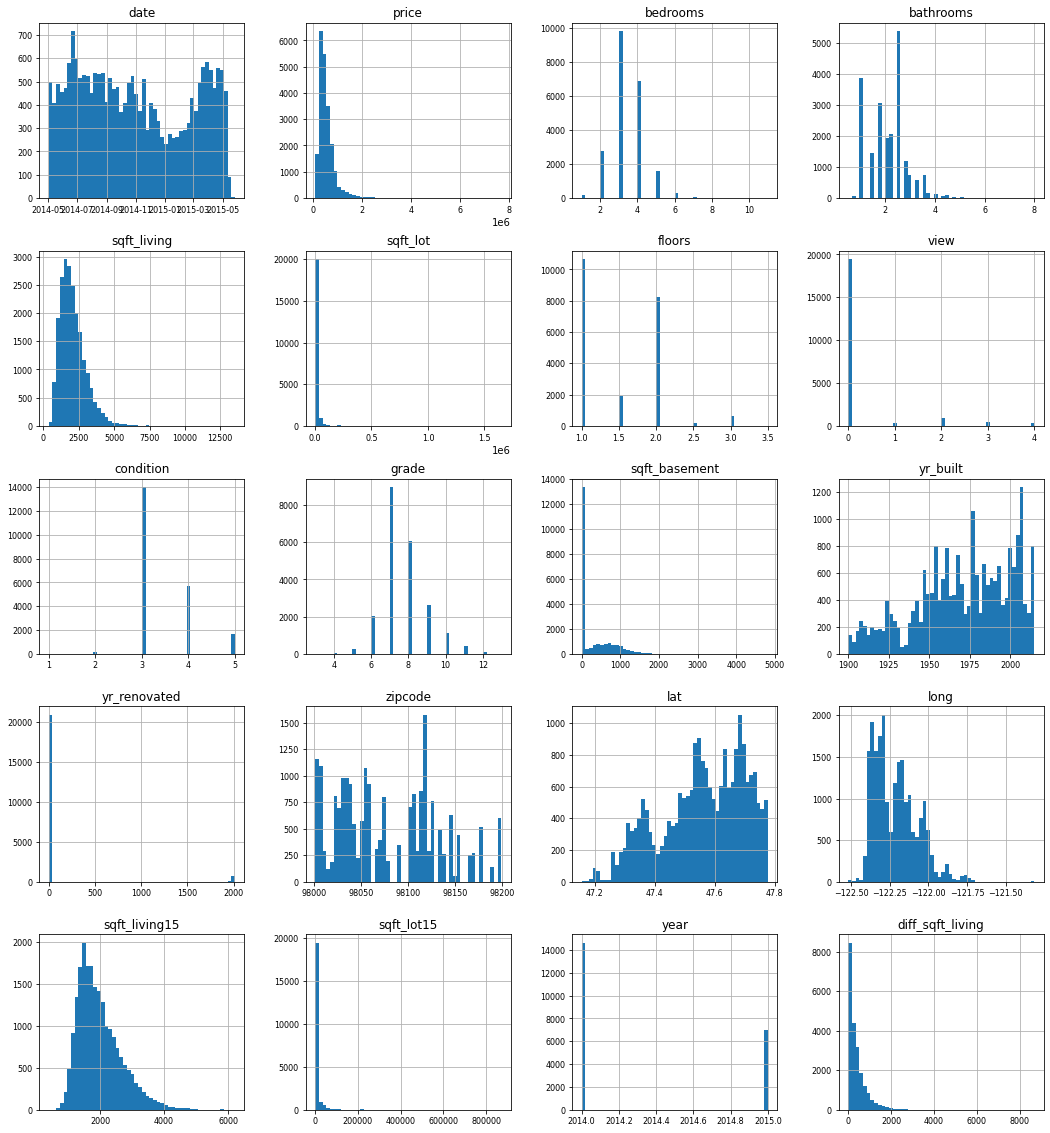

In [19]:
df.hist(figsize=(18, 20), bins=50, xlabelsize=8, ylabelsize=8);

A histogram of the price column is examined in more detail below. It appears that there are outliers which heavily skew the data.

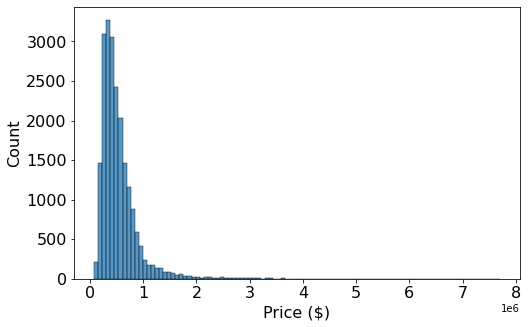

In [20]:
sns.histplot(data = df,x = 'price', bins=100)
plt.xlabel('Price ($)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

We now look at the distribution of house prices using a box plot. Based on the seaborn.boxplot docs, whis=1.5 which means that the whiskers are at Q3 + 1.5*IQR and at Q3 - 1.5*IQR. The lower whisker in the plot below however does not seem to correspond to LOWER_QUARTILE - IQR*1.5. 

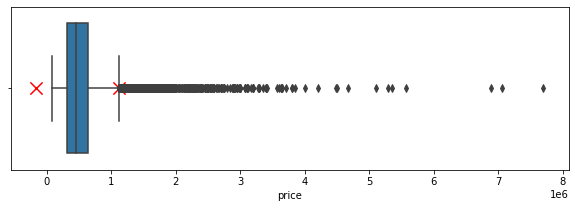

In [21]:
q1 = df["price"].quantile(0.25)
q3 =df["price"].quantile(0.75)
iqr = q3 - q1
limit_lower = q1 - 1.5*iqr
limit_upper = q3 + 1.5*iqr

fig, ax=plt.subplots(figsize=(10,3))
ax = sns.boxplot(x=df.price)
plt.scatter(limit_lower,0, color='red', marker='x', s=150)
plt.scatter(limit_upper,0, color='red', marker='x', s=150)
plt.show();

However for the outlier values are on the upper end of the prices so limiting the dataset to below Q3 + 1.5*IQR is reasonable. For our client I am more interested in affordable homes that have room for more profit. 

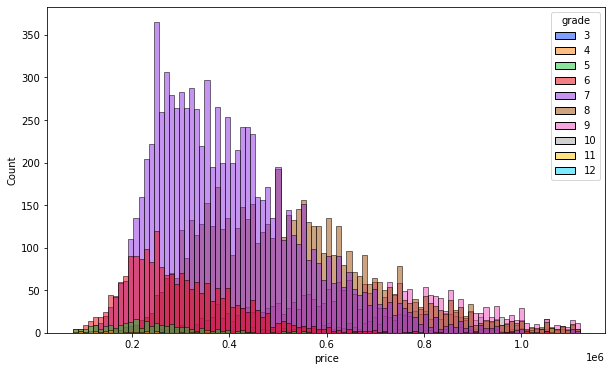

In [22]:
# Plotting a histogram of prices below Q3+1.5IQR
df_lower = df[df.price < limit_upper]
fig, ax=plt.subplots(figsize=(10,6))
sns.histplot(data = df_lower, x='price', hue='grade', bins=100, palette="bright", alpha=0.5)
plt.show();

Counting the number of grades and conditions, for house prices below Q3+1.5*IQR, the most common grade  is 7 and the most common condition is 3.

In [23]:
df_lower.value_counts('grade').reset_index(name='count').sort_values('grade', ascending=True).reset_index(drop=True)
df_lower.value_counts('condition').reset_index(name='count').sort_values('condition', ascending=True).reset_index(drop=True)

,grade,count
0,3,1
1,4,27
2,5,242
3,6,2037
4,7,8961
5,8,5943
6,9,2319
7,10,766
8,11,137
9,12,5


,condition,count
0,1,28
1,2,168
2,3,13268
3,4,5415
4,5,1559


Let's also look at the distribution of the house prices above Q3+1.5IQR.

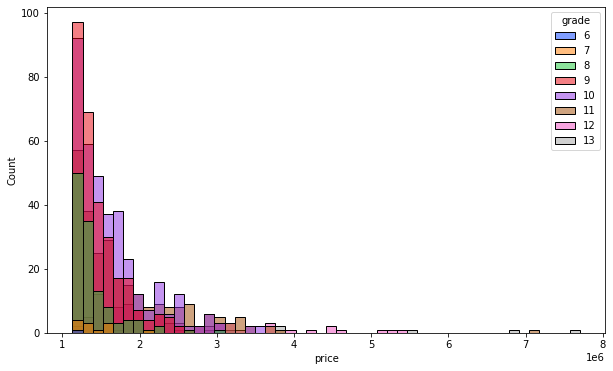

In [24]:
df_upper = df[df.price >= limit_upper]
fig, ax=plt.subplots(figsize=(10,6))
sns.histplot(data = df_upper, x = 'price', hue='grade', bins=50, palette="bright", alpha=0.5)
plt.show();

Now doing the same thing for the distribution of the house prices above Q3+1.5*IQR, the most common grade the outlier data is 10 and the most common condition is 3.

In [25]:
df_upper.value_counts('grade').reset_index(name='count').sort_values('grade', ascending=True).reset_index(drop=True)
df_upper.value_counts('condition').reset_index(name='count').sort_values('condition', ascending=True).reset_index(drop=True)

,grade,count
0,6,1
1,7,12
2,8,122
3,9,296
4,10,368
5,11,262
6,12,84
7,13,13


,condition,count
0,1,1
1,2,2
2,3,752
3,4,262
4,5,141


Alternatively, I also tried filtering the house prices for the 90th percentile. It is a simpler approach than having to calculate Q3 + 1.5*IQR. Since we will probably only work with house prices around the median value or less, this cutoff is justified.

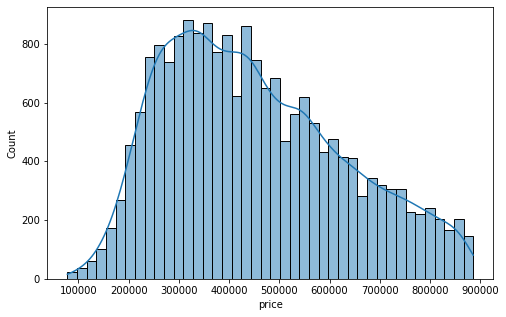

In [26]:
df_90th = df[df.price < df['price'].quantile(0.90)]
sns.histplot(data=df_90th, x="price", kde=True)
plt.show();

I also took a look at the distribution of house prices for renovated vs unrenovated houses. The mean price for renovated houses was higher than for unrenovated houses.

Unrenovated mean price: 448923.6178775683
Renovated mean price: 516250.722323049


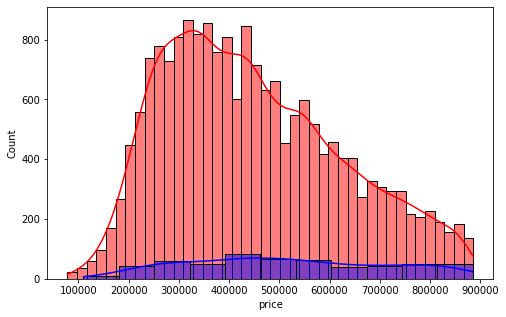

In [27]:
# Distribution in prices for renovated vs not renovated
df_norenov = df_90th[df_90th['yr_renovated'] == 0]
df_renov = df_90th[df_90th['yr_renovated'] != 0]
print('Unrenovated mean price: ' + str(df_norenov['price'].mean()))
print('Renovated mean price: ' + str(df_renov['price'].mean()))

sns.histplot(data=df_norenov, x="price", kde=True, color="red")
sns.histplot(data=df_renov, x="price", kde=True, color="blue")
plt.show();

## Testing hypotheses

1. The higher the condition, the higher the price
2. The higher the grade, the higher the price
3. Houses of similar size to their neighbors have higher prices

I am interested to know how condition and grade increases the house price. First, the prices from the whole data set is plotted as a scatter plot as a function of condition and grade. It can be observed that there are large variations in the price for the same condition and grade. The goal is to investigate for the client, how we can sell his houses for prices that are on the upper end of the scale, given a fixed condition or grade.

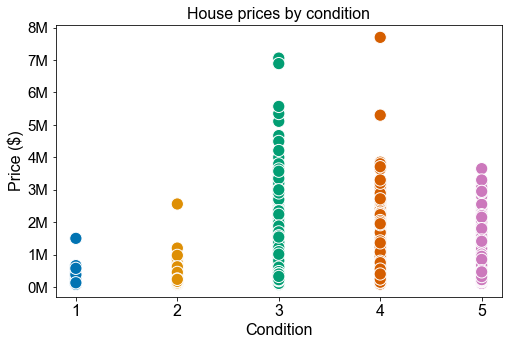

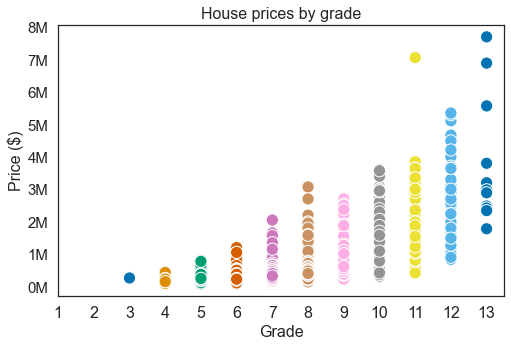

In [28]:
fig, ax=plt.subplots()
sns.set_theme(style="white")
sns.scatterplot(data = df, x = "condition", y = "price", hue = "condition", s=150, palette="colorblind")
plt.title('House prices by condition', fontsize=16)
plt.xlabel('Condition', fontsize=16)
plt.ylabel('Price ($)', fontsize=16)
plt.xticks(range(1,6), fontsize=16)
ax.set_yticklabels(['{:,.0f}'.format(x) + 'M' for x in ax.get_yticks()/1000000],fontsize=15)
plt.legend([],[], frameon=False)
plt.show();

fig, ax=plt.subplots()
sns.scatterplot(data = df, x = "grade", y = "price", hue = "grade", s=150, palette="colorblind")
plt.title('House prices by grade', fontsize=16)
plt.xlabel('Grade', fontsize=16)
plt.ylabel('Price ($)', fontsize=16)
plt.legend([],[], frameon=False)
plt.xticks(range(1,14), fontsize=16)
ax.set_yticklabels(['{:,.0f}'.format(x) + 'M' for x in ax.get_yticks()/1000000],fontsize=15)
plt.show();

Examining the house price distribution after for the 90th percentile of house prices:

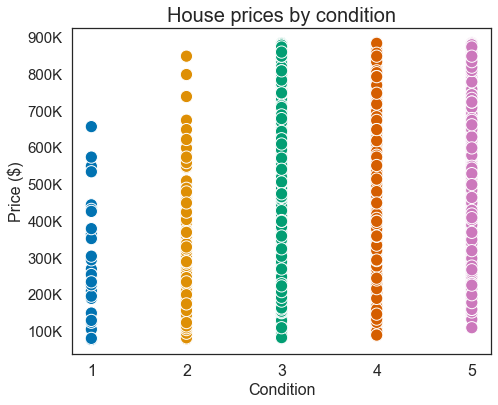

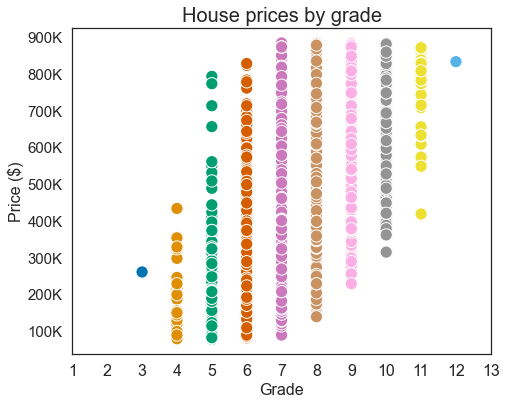

In [29]:
fig, ax=plt.subplots(figsize=(7.5,6))
sns.set_theme(style="white")
sns.scatterplot(data = df_90th, x = "condition", y = "price", hue = "condition", s=150, palette="colorblind")
plt.title('House prices by condition', fontsize=20)
plt.xlabel('Condition', fontsize=16)
plt.ylabel('Price ($)', fontsize=16)
plt.xticks(range(1,6), fontsize=16)
ax.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000],fontsize=15)
plt.legend([],[], frameon=False)
plt.savefig('price_by_condition_90percentile.png')
plt.show();

fig, ax=plt.subplots(figsize=(7.5,6))
sns.scatterplot(data = df_90th, x = "grade", y = "price", hue = "grade", s=150, palette="colorblind")
plt.title('House prices by grade', fontsize=20)
plt.xlabel('Grade', fontsize=16)
plt.ylabel('Price ($)', fontsize=16)
plt.legend([],[], frameon=False)
plt.xticks(range(1,14), fontsize=16)
ax.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000],fontsize=15)
plt.savefig('price_by_grade_90percentile.png')
plt.show();

Now looking at a box plot for condition vs price and grade vs price. It appears that a big increase in median house prices can be observed going from condition 2 to 3. In general, the median house price is also increasing with condition.

<AxesSubplot:xlabel='condition', ylabel='price'>

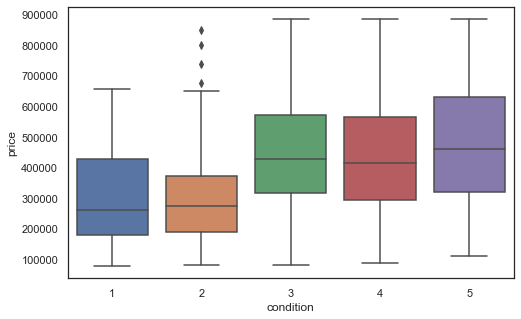

<AxesSubplot:xlabel='grade', ylabel='price'>

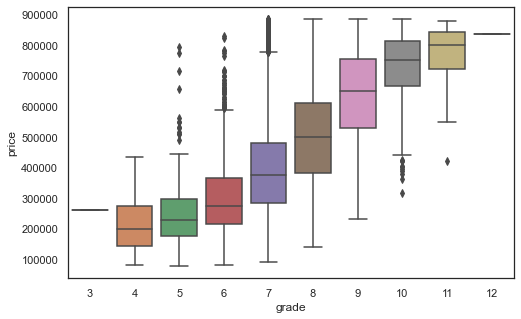

In [30]:
sns.boxplot( y=df_90th["price"] , x=df_90th["condition"]);
plt.show()

sns.boxplot( y=df_90th["price"] , x=df_90th["grade"]);
plt.show()

Instead of presenting boxplots to our stakeholder, I chose to make median, 25th percentile and 75th percentile plots of the house price vs condition and grade.

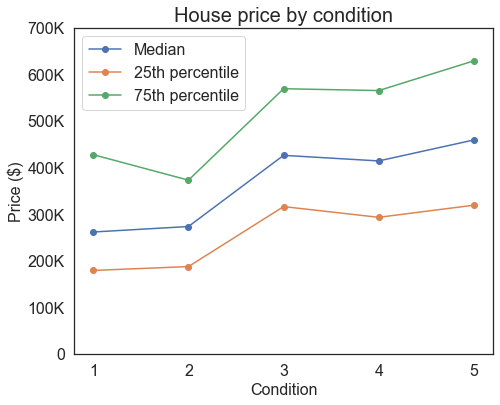

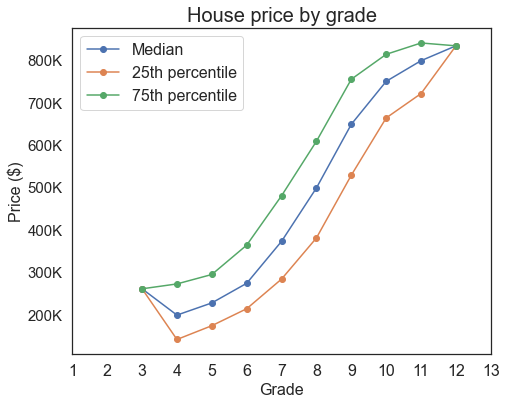

In [31]:
cond_price = df_90th.groupby('condition')['price'].mean().reset_index()
cond_price.rename(columns={'price':'mean_price'}, inplace=True)
cond_price['median'] = df_90th.groupby('condition')['price'].median().reset_index()['price']
cond_price['quantile0.75'] = df_90th.groupby('condition')['price'].quantile(0.75).reset_index()['price']
cond_price['quantile0.25'] = df_90th.groupby('condition')['price'].quantile(0.25).reset_index()['price']

grade_price = df_90th.groupby('grade')['price'].mean().reset_index()
grade_price.rename(columns={'price':'mean_price'}, inplace=True)
grade_price['median'] = df_90th.groupby('grade')['price'].median().reset_index()['price']
grade_price['quantile0.75'] = df_90th.groupby('grade')['price'].quantile(0.75).reset_index()['price']
grade_price['quantile0.25'] = df_90th.groupby('grade')['price'].quantile(0.25).reset_index()['price']

fig, ax=plt.subplots(figsize=(7.5,6))
#ax.plot(cond_price['condition'], cond_price["mean_price"], marker='o')
ax.plot(cond_price['condition'], cond_price['median'], marker='o', label="Median")
ax.plot(cond_price['condition'], cond_price["quantile0.25"], marker='o', label="25th percentile")
ax.plot(cond_price['condition'], cond_price["quantile0.75"], marker='o', label="75th percentile")
plt.title('House price by condition', fontsize=20)
plt.xlabel('Condition', fontsize=16)
plt.ylabel('Price ($)', fontsize=16)
plt.legend(loc=2, prop={'size': 16})
plt.xticks(range(1,6), fontsize=16)
plt.yticks(list(np.array(range(0,8))*100000),['0', '100K', '200K', '300K', '400K', '500K','600K','700K'], fontsize=16)
plt.savefig('houseprice_by_condition.png')
plt.show();

fig, ax=plt.subplots(figsize=(7.5,6))
#ax.plot(grade_price['grade'], grade_price["mean_price"], marker='o')
ax.plot(grade_price['grade'], grade_price["median"], marker='o', label="Median")
ax.plot(grade_price['grade'], grade_price["quantile0.25"], marker='o', label="25th percentile")
ax.plot(grade_price['grade'], grade_price["quantile0.75"], marker='o', label="75th percentile")
plt.title('House price by grade', fontsize=20)
plt.xlabel('Grade', fontsize=16)
plt.ylabel('Price ($)', fontsize=16)
plt.legend(loc=2, prop={'size': 16})
plt.xticks(range(1,14), fontsize=16)
ax.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000], fontsize=15)
plt.savefig('houseprice_by_grade.png')
plt.show();

Seeing the plots above, made me interested in finding out the price increase by upgrading from current next grade/condition to the one above. It can be observed that the biggest change in median price can be seen when you go from condition 6 to 7 or grade 2 to 3. 

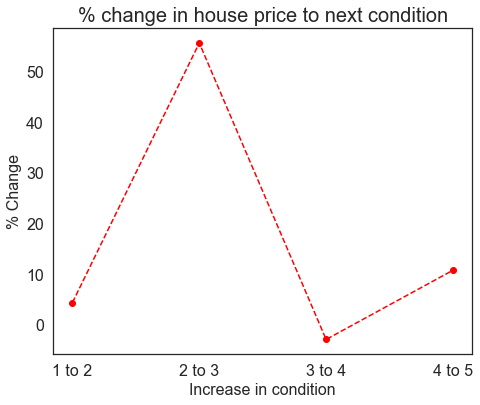

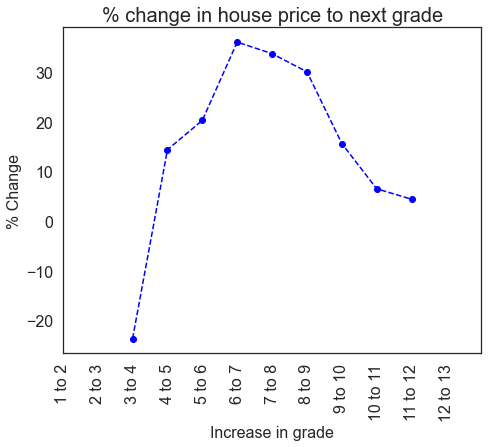

In [32]:
# Calculate difference in price and percentage change to next condition 
for idx in range(4):
    cond_price.loc[idx,'diff']=(cond_price.loc[idx+1,'median']-cond_price.loc[idx,'median'])
    cond_price.loc[idx,'percent_diff']=100.0*(cond_price.loc[idx+1,'median']-cond_price.loc[idx,'median'])/cond_price.loc[idx,'median']
    cond_price.loc[4,'percent_diff'] = float("NaN")

fig, ax=plt.subplots(figsize=(7.5,6))
plt.plot(cond_price['condition'], cond_price['percent_diff'], linestyle='--', marker='o', color="red")
plt.title('% change in house price to next condition', fontsize=20)
plt.xticks(range(1,5),fontsize=16)
ax.set_xticklabels(['1 to 2', '2 to 3', '3 to 4', '4 to 5'])
plt.yticks(fontsize=16)
plt.xlabel('Increase in condition', fontsize=16)
plt.ylabel('% Change', fontsize=16)
plt.show();

# Calculate difference in price and percentage change to next grade 
for idx in range(9):
    grade_price.loc[idx,'diff']=grade_price.loc[idx+1,'median']-grade_price.loc[idx,'median']
    grade_price.loc[idx,'percent_diff']=100.0*(grade_price.loc[idx+1,'median']-grade_price.loc[idx,'median'])/grade_price.loc[idx,'median']
    grade_price.loc[9,'percent_diff'] = float("NaN")

fig, ax=plt.subplots(figsize=(7.5,6))
plt.plot(grade_price['grade'], grade_price['percent_diff'], linestyle='--', marker='o', color="blue")
plt.title('% change in house price to next grade', fontsize=20)
plt.xlim((1,13))
plt.xticks(range(1,13), ['1 to 2', '2 to 3', '3 to 4', '4 to 5', '5 to 6', '6 to 7', '7 to 8', '8 to 9', '9 to 10', '10 to 11', '11 to 12', '12 to 13'], fontsize=16, rotation=90)
plt.xlabel('Increase in grade', fontsize=16)
plt.ylabel('% Change', fontsize=16)
plt.yticks(fontsize=16)
plt.show();

We do some calculations to see how the average % profit can be increased for different combinations of conditions and grade

In [33]:
# Average increase from condition 2 to 3 at grade 6
df26 = df_90th[(df_90th['condition'] == 2) & (df_90th['grade'] == 6)]
df36 = df_90th[(df_90th['condition'] == 3) & (df_90th['grade'] == 6)]
100*(df36.price.mean()-df26.price.mean())/df26.price.mean()
100*(df36.price.median()-df26.price.median())/df26.price.median()

# # Average increase from condition 2 to 3 at grade 7
# df27 = df_90th[(df_90th['condition'] == 2) & (df_90th['grade'] == 7)]
# df37 = df_90th[(df_90th['condition'] == 3) & (df_90th['grade'] == 7)]
# 100*(df37.price.mean()-df27.price.mean())/df27.price.mean()
# 100*(df37.price.median()-df27.price.median())/df27.price.median()

# # Average increase from condition 2 to 3 at grade 8
# df28 = df_90th[(df_90th['condition'] == 2) & (df_90th['grade'] == 8)]
# df38 = df_90th[(df_90th['condition'] == 3) & (df_90th['grade'] == 8)]
# 100*(df38.price.mean()-df28.price.mean())/df28.price.mean()

# Average increase from condition 2 to 3 and grade 6 to 7
df1 = df_90th[(df_90th['condition'] == 2) & (df_90th['grade'] == 6)]
df2 = df_90th[(df_90th['condition'] == 3) & (df_90th['grade'] == 7)]
100*(df2.price.mean()-df1.price.mean())/df1.price.mean()
100*(df2.price.median()-df1.price.median())/df1.price.median()

# Average increase from condition 2 to 3 and grade 7 to 8
df1 = df_90th[(df_90th['condition'] == 2) & (df_90th['grade'] == 7)]
df2 = df_90th[(df_90th['condition'] == 3) & (df_90th['grade'] == 8)]
100*(df2.price.mean()-df1.price.mean())/df1.price.mean()
100*(df2.price.median()-df1.price.median())/df1.price.median()




12.41229019917911

16.355653128430298

47.981638456622775

55.87266739846323

47.17899570914383

56.0655737704918

## Filtering for potential houses for our stakeholder

Plotting on a map all the 90th percentile house prices, we observe that the areas with the highest house prices were in Sammamish, Redmond and Bellevue, as ranked by niche.com

In [34]:
# Plotting the house prices below the 90th percentile
fig = px.scatter_mapbox(df_90th, lat="lat", lon="long", color="price", hover_name="zipcode", center=dict(lat=47.48, lon=-122.09), \
    opacity=1, zoom=8.4, width=600, height=600)
fig.update_layout(mapbox_style="open-street-map")

I filtered the data based on these conditions:
1. Houses built in or before 1972
2. Houses with condition of 2
3. Houses with a grade of 6 or 7
4. Houses where the difference between sqft_living and sqft_living15 was less than 100 sq ft.
5. Houses with zip codes belonging to this list of top areas in King County: [Niche](https://www.niche.com/places-to-live/search/best-places-to-live/c/king-county-wa/)

The results where then sorted for the 5 cheapest houses based on that criteria. The goal was to find the cheapest houses for most profit for a condition of 2 and grade or 6 or 7.

In [35]:
df_cond = df_90th[(abs(df_90th['diff_sqft_living']) < 100) & (df_90th['yr_built'] <= 1972) & (df['condition']== 2) & ((df['grade'] == 6) | (df['grade'] == 7))]

nice_zip_codes = [98029, 98074, 98075, 98052, 98004, 98005, 98006, 98007, 98008, 98009, 98015, 98052, 98053, 98007, \
                98073, 98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, \
                98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98146, 98154, 98164, 98174, \
                98177, 98178, 98195, 98199]

# Top five candidates by price
df_final = df_cond[df_cond['zipcode'].isin(nice_zip_codes)].sort_values('price',ascending=True).head(5)
df_final[['grade','zipcode','price','yr_built','bedrooms','bathrooms','sqft_living','sqft_lot']]

,grade,zipcode,price,yr_built,bedrooms,bathrooms,sqft_living,sqft_lot
9711,7,98125,305000.000,1964,6,2.000,1900,8240
8906,7,98115,350000.000,1950,3,1.750,1380,4590
242,7,98115,455000.000,1925,2,1.000,1430,5000
702,6,98005,480000.000,1950,4,2.000,2180,10575
6688,6,98118,509990.000,1921,3,2.000,1440,4859


### Top 5 candidates for our stakeholder

We want the houses that give us the most value for money, given condition = 2 and grade = 6 or 7. Plotting the top five candidate houses by price:

In [36]:
fig = px.scatter_mapbox(df_final, lat="lat", lon="long", color="price", size="price", hover_name="zipcode", opacity=1, zoom=8, width=600, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show();

## Top 2 recommendations for the stakeholder

Using google maps street view, the top 5 candidates were narrowed down some more to these final two:

In [37]:
df_final.loc[[242,702]]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,diff_sqft_living
242,2015-01-27,455000.000,2,1.000,1430,5000,1.500,False,0,2,...,1925,0,98115,47.673,-122.299,1450,3750,2015,Jan,20
702,2014-11-03,480000.000,4,2.000,2180,10575,1.000,False,0,2,...,1950,0,98005,47.589,-122.177,2180,12010,2014,Nov,0


### Investigating correlations in the data:

Plotting a scatter plot of the diff_sqft_living vs price, it appears there is no obvious correlation between the two columns.

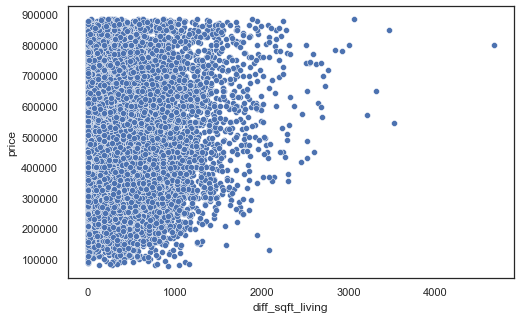

In [38]:
sns.scatterplot(x="diff_sqft_living", y="price", data=df_90th)
plt.show();

Building a correlation matrix:

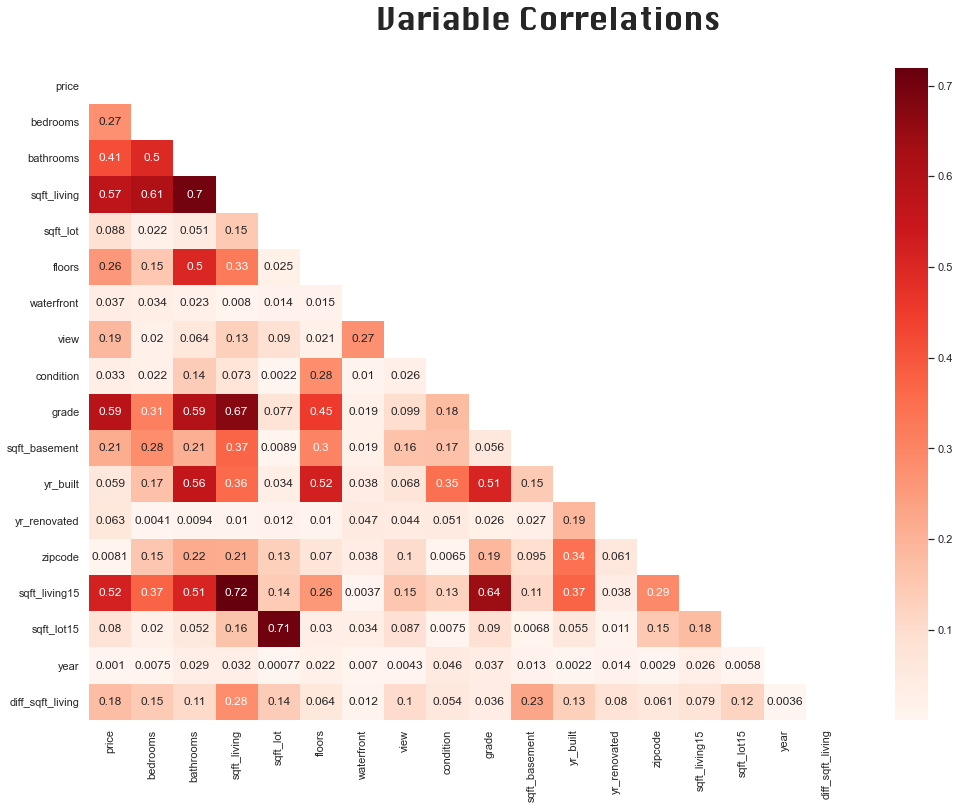

In [39]:
df_corr = df_90th.copy()
df_corr.drop(['lat','long'], axis=1, inplace=True)
mask = np.triu(np.ones_like(df_corr.corr(), dtype=np.bool))
corr = df_corr.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95, fontname='Silom')
heatmap = sns.heatmap(corr, cmap='Reds', mask=mask, annot=True)
plt.show();